## Overview

In this article we will be making an application which will remove or replace the background of the image with another image. For that we will be using the **mediapipe** library for segmenting the person from the background and **cv2** for performing image processing techniques.

## Application of background removal application

1. Background eraser: Sometimes in while filling up some forms we require to give the passport photograph with white or no background there this application could be very handy.


2. App like Zoom: It can be called as mini clone of Zoom application as in zoom also we have experienced the functionality where we can change the background.


3. Work from home setup: This application can be very handy in the case of meeting in the work from home setup as sometimes in video confrencing we might don't want our colleague to have a look on the background.

### Import the Libraries
Now we will be loading all the required libraries to build this application

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

## Firstly we need to initialize the selfie segmentation model

So, Our very first step will be to initialize our model which will be like a pre-step for the selfie segmentation model.
In this model we will have two types of model:

1. **`General Model`**: If we pass 0 as the parameter for the selfie segmentation model then the general model will be selected.
2. **`Landscape Model`**: If we will pass 1 as the parameter for the above model then the landscape model will be selected.
Note: If we will not specified any of the model then 0 will be selected by default i.e. General model.

But wait a minute! What is the difference between both the model ?
Let's discuss that:

When it comes to `General model` it specifically works on 256X256x1 i.e 256-Height, 256-Width, 1 channel as the input and 256x256x3 as the output.
While when we talk about `Landscape model` it specifically works on the 144X256X1 as the input and results in 144x256x3 output tensors other than that both general and landscape model is same.

In [2]:
change_background_mp = mp.solutions.selfie_segmentation

change_bg_segment = change_background_mp.SelfieSegmentation()

Code breakdown:

1. As discussed here we will initialize the segmentation model using `mp.solutions.selfie_segmentation` if we break it down then we can see that from mediapipe library we are calling solutions class and from that class we are calling `selfie_segmentation` model.


2. After model initialization we will  be setting our segmentation function i.e `SelfieSegmentation()`.

### Read an Image


So previously we have initialized ou segmentation model and created a selfie segmetation function as well not let's read our sample image and see what it looks like:

1. `cv2.imread`: To read the sample image from the local system.
2. `plt.imshow`: This is the matplotlib function which will help us to see/plot the image.

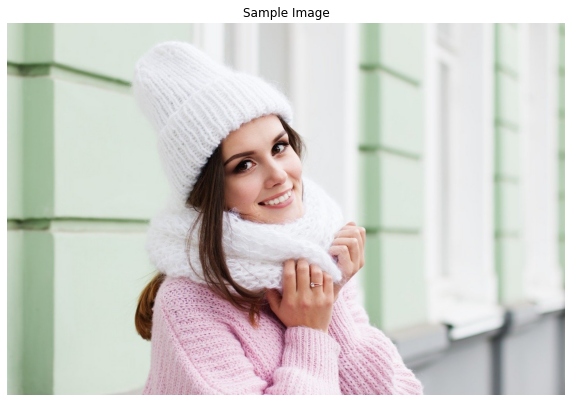

In [3]:
sample_img = cv2.imread('media/sample.jpg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

Code breakdown:

1. So firstly we are reading the image from **imread()** function 


2. Then before plotting/display the image we will set the size of the display using **figure** function.


3. Finally before displaying the image it will be a good practice to convert the image format from **RGB to BGR** as cv2 will read the image in that format only when it comes to colored image and then with the help of **imshow** function we will display the image.

## Remove/Replace Background 

So now we are all set to use the selfie segmentation model on our sample image first to remove or replace the background but before that as we know previously we have converted the sample image to BGR format as `cv2 library` read it correct in that way only but this is not the case for `mediapipe library` so we will re-convert the image from `BGR->RGB` format. 

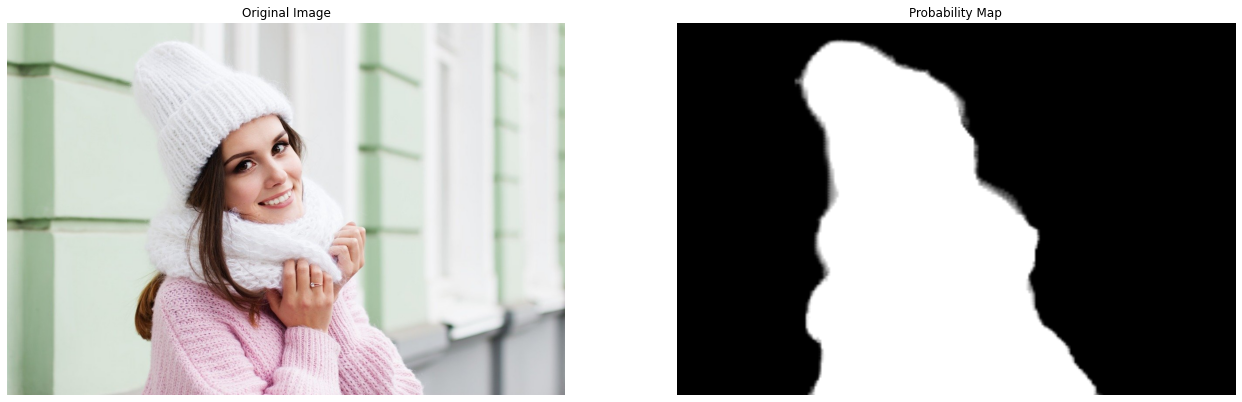

In [4]:
RGB_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

result = change_bg_segment.process(RGB_sample_img)

plt.figure(figsize=[22,22])
 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(result.segmentation_mask, cmap='gray');plt.title("Probability Map");plt.axis('off');

Code breakdown:

1. As discussed we will first convert the BGR format image to RGB format image.


2. Now with the help of `process` function we will process our selfie segmentation model on the sample image.


3. Then as we did in the Read image section here also we will set the figure size with the help of `figure` function.


4. Finally we will be displaying the original image as well as segmentated image side by side (by using `subplot` function of matplotlib) and `imshow` function.

Inference: So if we will closely look at the output (segmented subplot i.e. our main processed output) then there we can see that some areas are neither purely black nor purely white they are bit gray which indicates that at those places our model was not able to predict that it was the background or the person so for that reason we will be using the threshold technqiues to have more accurate segmentated area in the image.

So in our next step we will be using **`thresholding`** the mask so that we would only get two types of pixel values i.e Binary black and white mask which have pixel value of **1** for the person and **0** for the background.

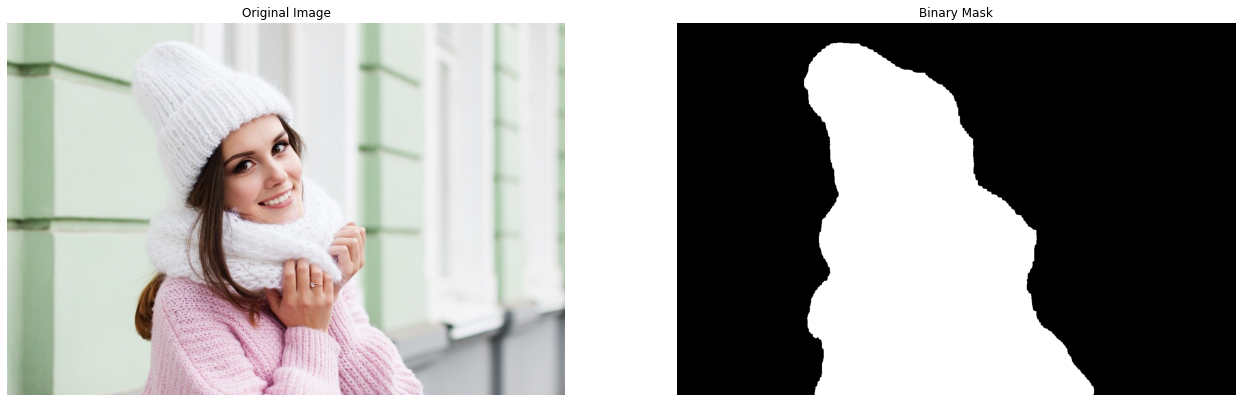

In [5]:
binary_mask = result.segmentation_mask > 0.9

plt.figure(figsize=[22,22])
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');

Code breakdown:

1. `Binary masking with thresholding`: Here, we are using the concept of binary masking which will have the pixel value of 1 for the person and pixel value 0 for the background also we will be setting up the threshold value of 0.9 i.e. confidence of 90% that pixel values when will be greater it will be 1 otherwise 0.


2. Now, again we will plot both the original and preprocessed image (one with the binary mask) using **subplots** and matplotlib's **imshow** function.

So by far we have segmented our image accurately by performing some image preprocessing techniques now it's time to visually see how the image's background will be removed so for that we will be using the `numpy.where()` function this function will use the binary mask values and returns `white` are for every 1 pixel value and then replace every area with 0 pixels i.e `black region` with `255` which means background will have white color only.


But before having the required output we have to first convert the one channel image into the three channel image using  `numpy.dstack` function.

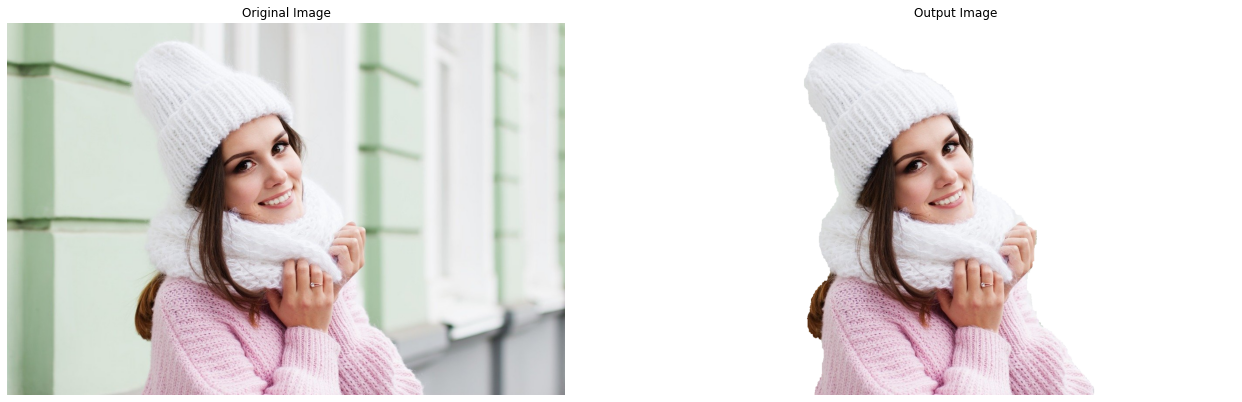

In [6]:
binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))

output_image = np.where(binary_mask_3, sample_img, 255)    

plt.figure(figsize=[22,22])
 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

Code breakdown:

1. As discussed that we will be using the **numpy's dstack** function to convert our image from one channel to three channel.


2. Now, we will be using the **numpy's where** function that will convert every black region to a white region i.e to remove the black segmented area with the white so that it appears to be like white background.


3. Finally we will set the image size using **figure** function and then display both original and output image using **imshow** function.

Note: By far for having the white background we have used 255 as the value but we can also have other background image as the output for that we just need to change the parameter in `np.where` function.

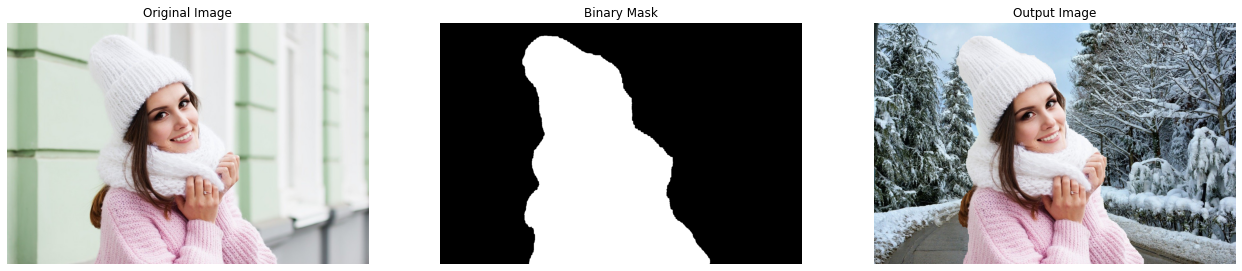

In [7]:
bg_img = cv2.imread('media/background.jpg')

output_image = np.where(binary_mask_3, sample_img, bg_img)     

plt.figure(figsize=[22,22])
plt.subplot(131);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(132);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');
plt.subplot(133);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

Code breakdown:

1. So here comes the last part where we will **`replace`** the background of the image. For that we will first read that background image using `imread` function.


2. Now we will create one final output image and using the **np.where** function we will replace the black region (binary asking) with the other background image that we just read.


3. Finally we will display the **`orginal image, sample image`** and the **`final segmentation result`**.

## Conclusion

So finally we have develop our application which can remove the background of any particular image that have person in it, though we can also create a functionality where it can be done in real time just like **zoom application** though the logic will be same only instead of image processing there we will be handling the video processing.